<a href="https://colab.research.google.com/github/YoshB/Binary_Clasification/blob/main/Binary_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using differents algorithms in the sklearn library

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as data_split
from sklearn.preprocessing  import StandardScaler as scaler
from sklearn.pipeline import Pipeline as pipe
from sklearn import metrics

#Models
from sklearn.tree import DecisionTreeClassifier as tree_c
from sklearn.neighbors import KNeighborsClassifier as kn_c
from sklearn.svm import SVC as sv_c
from sklearn.neural_network import MLPClassifier as mpl_c

# Functions

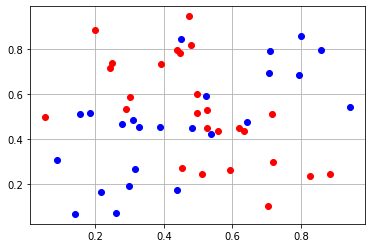

In [2]:
# Function to graph data 
# Entry: bidimensional array (coordinates: x,y), an array with the label of the point
# a tuple with the style we want to graph

def graficar(x, etiqueta, estilos):
  plt.plot(x[etiqueta==0,0], x[etiqueta==0,1], estilos[0], fillstyle='none',markersize=10)
  plt.plot(x[etiqueta==1,0], x[etiqueta==1,1], estilos[1], fillstyle='none', markersize=10)

#Function to show the results
# Entry: a trained model, the array of x and the array of y for the test data
#Output: a compilation of the accuracy of the model (Classification metrics, confusion matrix and ROC curve)
def Resultados(model, x_test, y_test):
  y_p = model.predict(x_test)

  #Print metrics
  print("Metrics: \n", metrics.classification_report(y_test, y_p))
  print("Confussion Matriz: \n", metrics.confusion_matrix(y_test, y_p))

  #Graph
  plt.figure(); plt.grid(); plt.xlabel('X1'); plt.ylabel('X2')
  graficar(x_test, y_p, ('rx','bx'))
  graficar(x_test,y_test,estilo) 
  plt.show()
  #ROC curve
  plt.figure()
  metrics.plot_roc_curve(model, x_test, y_test)
  plt.title("ROC Curve")
  plt.show()

#XOR function
#Entry: an integer that represent the number of points we want, a scale of noise to the points
def XOR_extended(num_datos, noise_scale=0.1):
  x = np.random.choice([0.3, 0.7], size=(num_datos,2))
  y = np.zeros(num_datos)
  for i in range(x.shape[0]):
    if x[i,0] > 0.5 and x[i,1] > 0.5:
      y[i] = 1
    elif x[i,0] < 0.5 and x[i,1] < 0.5:
      y[i] = 1
  x = x + (-1 + (2)*np.random.rand(num_datos,2)) * noise_scale;
  return x,y

# XOR gate
x4,y4 = XOR_extended(50, noise_scale=0.25)
x4_train, x4_test, y4_train, y4_test = data_split(x4,y4,test_size=0.15)

plt.figure(); plt.grid();
plt.plot(x4[y4==0,0], x4[y4==0,1], 'ro')
plt.plot(x4[y4==1,0], x4[y4==1,1], 'bo')
plt.show()



# Load data

In [3]:
df1 = pd.read_csv("df_clasificacion_1.cvs")
df2 = pd.read_csv("df_clasificacion_2.cvs")
df3 = pd.read_csv("df_clasificacion_3.cvs")

#Estyle to graph
estilo = ('ro','bo')

x_1, x_2 = np.asanyarray(df1[['x1']]), np.asanyarray(df1[['x2']])
y1 = np.asanyarray(df1['y'])
x1 = np.concatenate((x_1, x_2), axis=1)

x_1, x_2 = np.asanyarray(df2[['x1']]), np.asanyarray(df2[['x2']])
y2 = np.asanyarray(df2['y'])
x2 = np.concatenate((x_1, x_2), axis=1)

x_1, x_2 = np.asanyarray(df3[['x1']]), np.asanyarray(df3[['x2']])
y3 = np.asanyarray(df3['y'])
x3 = np.concatenate((x_1, x_2), axis=1)

# split the data into test and train data
x1_train, x1_test, y1_train, y1_test = data_split(x1,y1,test_size=0.15)
x2_train, x2_test, y2_train, y2_test = data_split(x2,y2,test_size=0.15)
x3_train, x3_test, y3_train, y3_test = data_split(x3,y3,test_size=0.15)


# Create and compare the models

Desition tree
Train score:  0.9294117647058824
Test score:  0.7333333333333333
Metrics: 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        50
         1.0       0.92      0.88      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Confussion Matriz: 
 [[46  4]
 [ 6 44]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


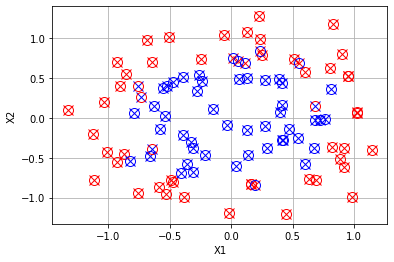

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

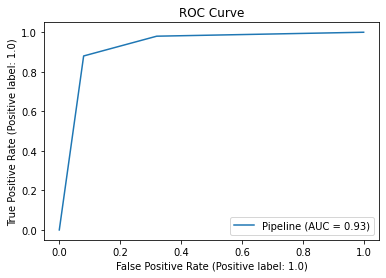


K neighbors
Train score:  0.9294117647058824
Test score:  0.6
Metrics: 
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        50
         1.0       0.87      0.90      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

Confussion Matriz: 
 [[43  7]
 [ 5 45]]


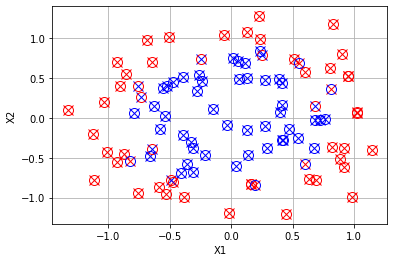

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

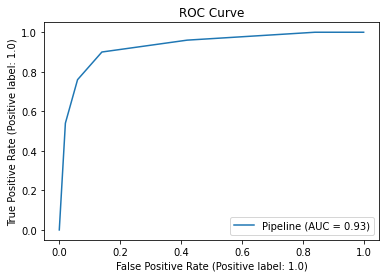


SVM
Train score:  0.8823529411764706
Test score:  0.6666666666666666
Metrics: 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        50
         1.0       0.87      0.82      0.85        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100

Confussion Matriz: 
 [[44  6]
 [ 9 41]]


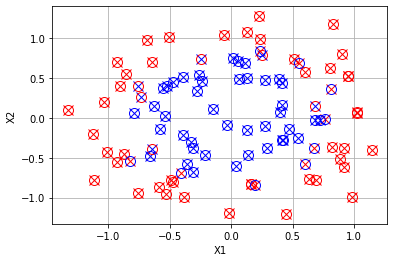

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

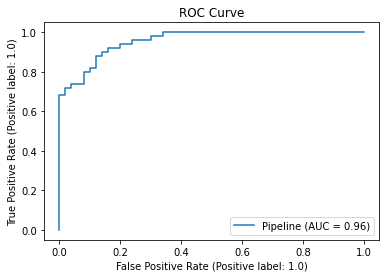


Multi layer erceptrón
Train score:  0.9411764705882353
Test score:  0.7333333333333333
Metrics: 
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        50
         1.0       0.90      0.92      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Confussion Matriz: 
 [[45  5]
 [ 4 46]]


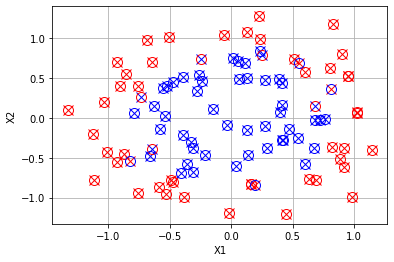

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

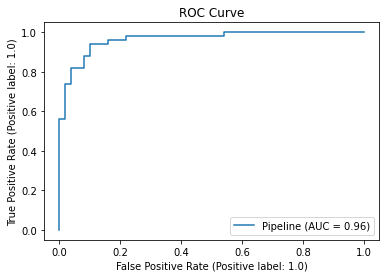

In [6]:
tree_model = pipe([('scaler', scaler()), ('cla', tree_c(max_depth=4))])
kn_model = pipe([('scaler', scaler()), ('cla',kn_c( n_neighbors=5))])
svm_model = pipe([('scaler', scaler()),('cla', sv_c(C=0.2, kernel='rbf'))])
mlp_model = pipe([('scale', scaler()), ('cla', mpl_c(hidden_layer_sizes=15, max_iter = 1000))]) 

# Choose the problem's data  (1, 2, 3 o 4)
datos = 2
if datos == 1:
  x_train = x1_train; y_train = y1_train;
  x_test = x1_test; y_test = y1_test;
  x = x1; y = y1;
elif datos == 2:
    x_train = x2_train; y_train = y2_train;
    x_test = x2_test; y_test = y2_test;
    x = x2; y = y2;
elif datos == 3:
  x_train = x3_train; y_train = y3_train;
  x_test = x3_test; y_test = y3_test;
  x = x3; y = y3;
elif datos == 4:
  x_train = x4_train; y_train = y4_train;
  x_test = x4_test; y_test = y4_test;
  x = x4; y = y4;

tree_model.fit(x_train,y_train)
kn_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
mlp_model.fit(x_train,y_train)

# Desition tree
print("Desition tree")
print("Train score: ", tree_model.score(x_train, y_train))
print("Test score: ", tree_model.score(x_test, y_test))
Resultados(tree_model, x, y)
print("")

# Kneighbors
print("K neighbors")
print("Train score: ", kn_model.score(x_train, y_train))
print("Test score: ", kn_model.score(x_test, y_test))
Resultados(kn_model, x, y)
print("")

# SVM (Support vectorial machine)
print("SVM")
print("Train score: ", svm_model.score(x_train, y_train))
print("Test score: ", svm_model.score(x_test, y_test))
Resultados(svm_model, x, y)
print("")

#MLP
print("Multi layer erceptrón")
print("Train score: ", mlp_model.score(x_train, y_train))
print("Test score: ", mlp_model.score(x_test, y_test))
Resultados(mlp_model, x, y)
